
https://www.kaggle.com/sogun3/uspollution

The AQS Data Mart is a database containing all of the information from AQS. It has every measured value the EPA 
has collected via the national ambient air monitoring program. It also includes the associated aggregate values 
calculated by EPA (8-hour, daily, annual, etc.). The AQS Data Mart is a copy of AQS made once per week and made 
accessible to the public through web-based applications. The intended users of the Data Mart are air quality data 
analysts in the regulatory, academic, and health research communities. It is intended for those who need to 
download large volumes of detailed technical data stored at EPA and does not provide any interactive analytical 
tools. It serves as the back-end database for several Agency interactive tools that could not fully function 
without it: AirData, AirCompare, The Remote Sensing Information Gateway, the Map Monitoring Sites KML page, etc.

AQS must maintain constant readiness to accept data and meet high data integrity requirements, thus is limited 
in the number of users and queries to which it can respond. The Data Mart, as a read only copy, can allow wider 
access.

47 states: District of Columbia, Country of Mexica
Missing ['Mississippi', 'Montana', 'Nebraska', 'Vermont', 'West Virginia']

Data was there, there were over about half the values were missing for the Air Quality Index for CO and SO2 but everythig else was there!  There were a few reading of negative values for the NO2 Mean, NO2 First Max Value, and SO2 Mean, SO2 First Max Value, CO Mean.   There were also duplicate days so data was averaged and aggregated.



The Clean Air Act requires EPA to set National Ambient Air Quality Standards (NAAQS)National Ambient Air Quality StandardsStandards established by EPA for maximum allowable concentrations of six "criteria" pollutants in outdoor air. This data set looks at four of the six pollutants are carbon monoxide, ground-level ozone, nitrogen dioxide, and sulfur dioxide. The standards are set at a level that protects public health with an adequate margin of safety. for six common air pollutants (also known as "criteria air pollutants"). These pollutants are found all over the U.S. They can harm your health and the environment, and cause property damage.


In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import scipy.stats as sc
import seaborn as sns


In [84]:
# Reading in the data from https://www.kaggle.com/sogun3/uspollution
data = pd.read_csv('/home/slindhult/assignments/Capstone-1/Data/pollution_us_2000_2016.csv')

In [85]:
# Understanding the size of the dataframe
data.shape

(1746661, 29)

In [86]:
data.columns

Index(['Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'Address',
       'State', 'County', 'City', 'Date Local', 'NO2 Units', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI'],
      dtype='object')

In [87]:
#Understanding the quality of the data by identifying null values
lst=[]

for col in data.columns:
    lst.append((col, data[col].isnull().sum()))
lst

[('Unnamed: 0', 0),
 ('State Code', 0),
 ('County Code', 0),
 ('Site Num', 0),
 ('Address', 0),
 ('State', 0),
 ('County', 0),
 ('City', 0),
 ('Date Local', 0),
 ('NO2 Units', 0),
 ('NO2 Mean', 0),
 ('NO2 1st Max Value', 0),
 ('NO2 1st Max Hour', 0),
 ('NO2 AQI', 0),
 ('O3 Units', 0),
 ('O3 Mean', 0),
 ('O3 1st Max Value', 0),
 ('O3 1st Max Hour', 0),
 ('O3 AQI', 0),
 ('SO2 Units', 0),
 ('SO2 Mean', 0),
 ('SO2 1st Max Value', 0),
 ('SO2 1st Max Hour', 0),
 ('SO2 AQI', 872907),
 ('CO Units', 0),
 ('CO Mean', 0),
 ('CO 1st Max Value', 0),
 ('CO 1st Max Hour', 0),
 ('CO AQI', 873323)]

In [88]:
#Understanding the quality of the data by identifying negative values and removing them
a = data.copy()
purged = a[(a[['NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour',
       'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour']] >=0).all(1)]


In [127]:
cleaned = purged.drop(['Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'County', 'City', 'NO2 Units',
       'O3 Units',
       'SO2 Units',
       
       'CO Units'], axis=1)
cleaned['Date'] = cleaned['Date Local']

clean = cleaned.groupby(['Date Local', 'Address','State']).agg({'NO2 Mean':'mean',
       'NO2 1st Max Value':'mean', 'NO2 1st Max Hour':'mean', 'NO2 AQI':'mean',
       'O3 Mean':'mean', 'O3 1st Max Value':'mean', 'O3 1st Max Hour':'mean', 'O3 AQI':'mean',
       'SO2 Mean':'mean', 'SO2 1st Max Value':'mean', 'SO2 1st Max Hour':'mean', 'SO2 AQI':'mean',
        'CO Mean':'mean', 'CO 1st Max Value':'mean', 'CO 1st Max Hour':'mean', 'CO AQI':'mean'})
clean = clean.reset_index()
clean = clean.drop(['Address'],axis=1)

In [159]:
clean_lst=[]

for col in clean.columns:
    clean_lst.append((col, clean[col].isnull().sum()))
clean_lst

[('Date Local', 0),
 ('State', 0),
 ('NO2 Mean', 0),
 ('NO2 1st Max Value', 0),
 ('NO2 1st Max Hour', 0),
 ('NO2 AQI', 0),
 ('O3 Mean', 0),
 ('O3 1st Max Value', 0),
 ('O3 1st Max Hour', 0),
 ('O3 AQI', 0),
 ('SO2 Mean', 0),
 ('SO2 1st Max Value', 0),
 ('SO2 1st Max Hour', 0),
 ('SO2 AQI', 589),
 ('CO Mean', 0),
 ('CO 1st Max Value', 0),
 ('CO 1st Max Hour', 0),
 ('CO AQI', 225),
 ('year', 0)]

In [8]:
# Understanding what data is included - looks like some states are missing
states = data['State'].unique()
states_list = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
missing = [state for state in states_list if state not in states]
missing

['Guam',
 'Mississippi',
 'Montana',
 'Nebraska',
 'Puerto Rico',
 'Vermont',
 'West Virginia']

In [9]:
purged.shape

(1722197, 29)

In [93]:
#purged['month-day'] = purged['Date Local'].apply(lambda x: x[-5:]) 
clean['month-day'] = clean['Date Local'].apply(lambda x: x[-5:]) 


In [11]:
#purged['Date Local']=pd.to_datetime(purged['Date Local'])

In [12]:
empty_list = []
for i in data.columns:
    empty_list.append((i, data[i].isnull().sum()))
empty_list

[('Unnamed: 0', 0),
 ('State Code', 0),
 ('County Code', 0),
 ('Site Num', 0),
 ('Address', 0),
 ('State', 0),
 ('County', 0),
 ('City', 0),
 ('Date Local', 0),
 ('NO2 Units', 0),
 ('NO2 Mean', 0),
 ('NO2 1st Max Value', 0),
 ('NO2 1st Max Hour', 0),
 ('NO2 AQI', 0),
 ('O3 Units', 0),
 ('O3 Mean', 0),
 ('O3 1st Max Value', 0),
 ('O3 1st Max Hour', 0),
 ('O3 AQI', 0),
 ('SO2 Units', 0),
 ('SO2 Mean', 0),
 ('SO2 1st Max Value', 0),
 ('SO2 1st Max Hour', 0),
 ('SO2 AQI', 872907),
 ('CO Units', 0),
 ('CO Mean', 0),
 ('CO 1st Max Value', 0),
 ('CO 1st Max Hour', 0),
 ('CO AQI', 873323)]

In [94]:
clean.describe()

,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
count,407557.000000,407557.000000,407557.000000,407557.000000,407557.000000,407557.000000,407557.000000,407557.000000,407557.000000,407557.000000,407557.000000,406968.000000,407557.000000,407557.000000,407557.000000,407332.000000
mean,13.038571,25.728235,11.739090,24.202697,0.026084,0.039235,10.178661,36.015476,1.931254,4.623162,9.644190,7.348132,0.371095,0.630276,7.909619,6.079422
std,9.600823,16.108238,7.871853,15.263053,0.011424,0.015341,3.986113,19.680719,2.812063,7.534034,6.333533,12.090029,0.318065,0.629971,6.742213,5.967187
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.912500,13.000000,5.000000,12.000000,0.017792,0.029000,9.000000,25.000000,0.276191,0.800000,4.500000,1.000000,0.186503,0.250000,3.000000,2.000000
50%,10.958333,24.000000,9.000000,23.000000,0.025875,0.038000,10.000000,33.000000,1.000000,2.000000,9.500000,3.000000,0.294152,0.450000,6.500000,5.000000
75%,18.041667,36.000000,20.000000,34.000000,0.033917,0.048000,11.000000,42.000000,2.417080,5.300000,13.500000,9.000000,0.468750,0.780000,11.000000,8.000000
max,139.541667,267.000000,23.000000,132.000000,0.095083,0.141000,23.000000,218.000000,321.612500,350.800000,23.000000,200.000000,7.151993,17.700000,23.000000,201.000000


In [95]:
state = clean[[
       'State', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
        'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI']].copy()

In [96]:
# Mean pollutants
s = state.groupby('State').agg({'NO2 Mean':'mean',
       'NO2 1st Max Value':'mean', 'NO2 1st Max Hour':'mean', 'NO2 AQI':'mean',
       'O3 Mean':'mean', 'O3 1st Max Value':'mean', 'O3 1st Max Hour':'mean', 'O3 AQI':'mean',
       'SO2 Mean':'mean', 'SO2 1st Max Value':'mean', 'SO2 1st Max Hour':'mean', 'SO2 AQI':'mean',
        'CO Mean':'mean', 'CO 1st Max Value':'mean', 'CO 1st Max Hour':'mean', 'CO AQI':'mean'})

In [97]:
s

,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
State,,,,,,,,,,,,,,,,
Alabama,9.437204,23.040774,13.154839,21.298065,0.024689,0.038560,9.325161,36.972903,1.043634,4.265161,10.769032,7.095855,0.213009,0.408284,9.452903,3.852903
Alaska,11.332871,21.076518,12.220648,19.580972,0.012790,0.019101,10.350202,17.712551,6.092910,9.671053,9.992915,14.506073,0.423515,0.677419,10.128543,6.528340
Arizona,19.071376,38.333948,14.229785,36.045417,0.024868,0.042875,10.115597,38.739995,1.341550,2.719493,10.313373,4.204401,0.488315,0.980713,9.512264,9.166862
Arkansas,9.609277,22.584360,12.176836,21.058649,0.025664,0.038185,10.077310,34.363152,1.550031,2.474504,9.629591,3.411286,0.426547,0.571838,7.963344,6.041321
California,13.681822,25.665369,11.245909,24.191528,0.026018,0.038680,10.201992,35.398964,1.184825,2.402357,8.528772,3.724780,0.450312,0.776474,7.449775,7.466025
Colorado,19.658481,38.071889,10.619244,35.951777,0.023500,0.038103,10.033139,34.473546,1.512454,5.993726,9.047880,10.632499,0.444089,0.815677,8.682665,7.742338
Connecticut,9.062723,19.729596,10.434771,18.599326,0.028883,0.040338,10.474394,37.161725,0.920261,2.346806,10.769340,3.258073,0.251780,0.368023,8.245216,3.602670
Country Of Mexico,20.314785,40.270050,13.218960,37.960570,0.021900,0.036075,9.617450,31.928691,1.951999,4.201804,10.847735,6.571728,0.853698,1.982506,10.283767,17.698699
Delaware,11.591813,23.212101,11.096810,21.557756,0.026506,0.038095,10.108911,35.410341,1.015886,2.193729,10.991199,2.828383,0.261773,0.400968,8.914741,3.839384


In [98]:
day = clean[[
       'State', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
        'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI','month-day']].copy()

In [99]:
#Mean pollutant state and day
day_state = day.groupby(['State','month-day']).agg({'NO2 Mean':'mean',
       'NO2 1st Max Value':'mean', 'NO2 1st Max Hour':'mean', 'NO2 AQI':'mean',
       'O3 Mean':'mean', 'O3 1st Max Value':'mean', 'O3 1st Max Hour':'mean', 'O3 AQI':'mean',
       'SO2 Mean':'mean', 'SO2 1st Max Value':'mean', 'SO2 1st Max Hour':'mean', 'SO2 AQI':'mean',
        'CO Mean':'mean', 'CO 1st Max Value':'mean', 'CO 1st Max Hour':'mean', 'CO AQI':'mean'})

In [100]:
byday = clean[[
       'month-day','NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
        'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI']].copy()

In [101]:
eachday = byday.groupby('month-day').agg({'NO2 Mean':'mean',
       'NO2 1st Max Value':'mean', 'NO2 1st Max Hour':'mean', 'NO2 AQI':'mean',
       'O3 Mean':'mean', 'O3 1st Max Value':'mean', 'O3 1st Max Hour':'mean', 'O3 AQI':'mean',
       'SO2 Mean':'mean', 'SO2 1st Max Value':'mean', 'SO2 1st Max Hour':'mean', 'SO2 AQI':'mean',
        'CO Mean':'mean', 'CO 1st Max Value':'mean', 'CO 1st Max Hour':'mean', 'CO AQI':'mean'})

In [102]:
eachday

,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
month-day,,,,,,,,,,,,,,,,
01-01,14.569473,26.484119,12.183402,24.929303,0.018081,0.027562,10.603484,23.962602,1.919720,3.917444,8.603996,6.000000,0.512314,0.948258,9.721568,9.095897
01-02,16.422122,28.580289,13.532508,26.884933,0.016650,0.025648,10.086687,22.273478,1.918562,4.083566,9.837203,6.319028,0.514306,0.908524,10.098039,8.851393
01-03,17.631386,30.452210,13.321172,28.638232,0.015959,0.024970,10.017472,21.710175,2.062527,4.310946,10.263361,6.689106,0.543842,0.993317,10.013104,9.493313
01-04,18.496375,30.719464,12.791967,28.910917,0.015558,0.024457,10.292997,21.294027,2.289908,4.799820,10.316941,7.412887,0.570610,1.018490,8.922331,9.882595
01-05,18.505704,30.986708,13.062372,29.139571,0.015575,0.024257,10.254601,21.109407,2.239597,4.724463,10.254346,7.359918,0.567873,1.023884,9.533487,9.868609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12-27,16.669456,28.717194,13.625527,27.048523,0.016430,0.025414,9.810127,21.952004,1.923549,4.130011,10.330960,6.343552,0.515615,0.916576,9.881329,8.939746
12-28,17.559313,29.670507,13.104651,27.945560,0.016071,0.025424,10.932347,21.991015,2.167369,4.540407,10.112579,6.916931,0.538629,0.952242,9.191068,9.379894
12-29,17.206335,29.744293,12.657068,27.980105,0.015914,0.025143,10.243455,21.746073,2.097435,4.341963,10.270681,6.653040,0.527064,0.946584,9.668325,9.305236


In [22]:
cols = eachday.columns

In [175]:

m = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

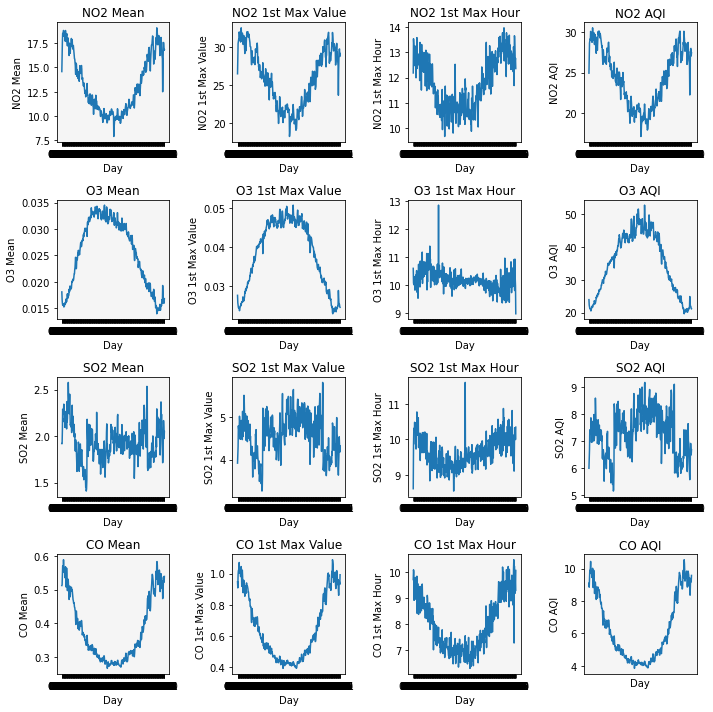

In [193]:
fig, axs = plt.subplots(4,4,figsize=(10,10))

axs=axs.flatten()
for i, col in enumerate(cols):   
    axs[i].plot(eachday.index,eachday[col])
    axs[i].set_title(col)
    axs[i].set_xlabel('Day')
    axs[i].set_ylabel(col)
    axs[i].set_facecolor('#F5F5F5')
    axs[i].xaxis.set_major_formatter(plt.NullFormatter())
fig.tight_layout()  


In [131]:
clean['year'] = clean['Date Local'].apply(lambda x: x[:4]) 

In [132]:
clean.head()

,Date Local,State,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,year
0,2000-01-01,Virginia,31.000000,41.0,23.0,39.0,0.002750,0.006,11.0,5.0,11.645834,16.8,10.0,26.0,1.244518,1.5,2.5,16.0,2000
1,2000-01-01,California,5.272727,19.0,17.0,18.0,0.025917,0.028,14.0,24.0,2.524026,5.5,17.0,10.0,0.270933,0.3,5.0,3.0,2000
2,2000-01-01,California,17.652174,27.0,2.0,25.0,0.019333,0.029,14.0,25.0,2.338961,3.0,8.0,4.0,0.447343,0.7,4.0,7.0,2000
3,2000-01-01,California,9.304348,24.0,7.0,23.0,0.032917,0.041,10.0,35.0,0.402795,2.3,9.5,4.0,0.466787,1.0,9.0,9.0,2000
4,2000-01-01,Louisiana,31.083333,72.0,18.0,70.0,0.023350,0.038,10.0,32.0,7.737500,12.3,2.0,21.0,0.845943,1.5,20.5,14.0,2000


In [106]:
year = clean[[
         'NO2 Mean', 'NO2 AQI',
       'O3 Mean','O3 AQI',
       'SO2 Mean','SO2 AQI',
        'CO Mean','CO AQI', 'year']].copy()

In [107]:
# Mean pollutants
y = year.groupby('year').agg({'NO2 Mean':'mean',
       'NO2 AQI':'mean',
       'O3 Mean':'mean', 'O3 AQI':'mean',
       'SO2 Mean':'mean', 'SO2 AQI':'mean',
        'CO Mean':'mean', 'CO AQI':'mean'})

In [108]:
y.columns

Index(['NO2 Mean', 'NO2 AQI', 'O3 Mean', 'O3 AQI', 'SO2 Mean', 'SO2 AQI',
       'CO Mean', 'CO AQI'],
      dtype='object')

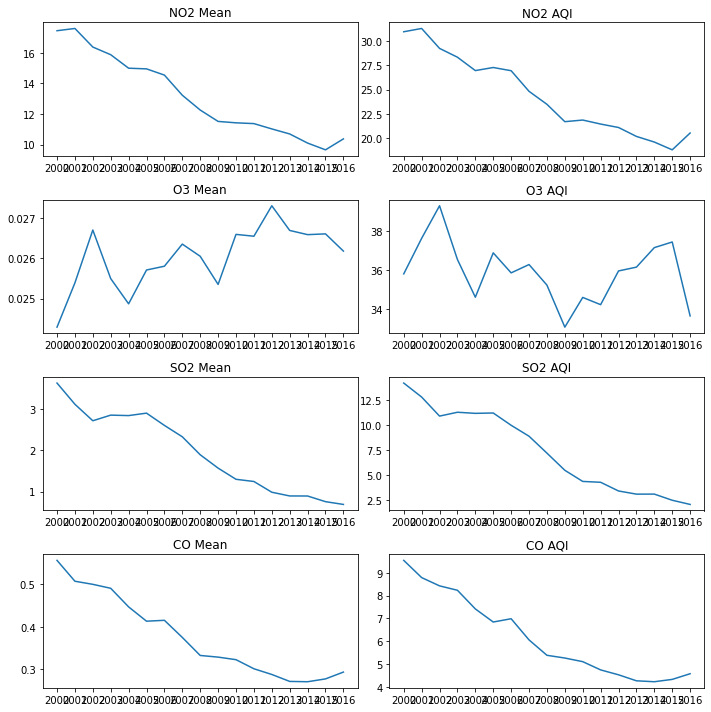

In [109]:
fig, axs = plt.subplots(4,2,figsize=(10,10))

ycols = ['NO2 Mean', 'NO2 AQI', 'O3 Mean', 'O3 AQI', 'SO2 Mean', 'SO2 AQI',
       'CO Mean', 'CO AQI']

axs=axs.flatten()
for i, col in enumerate(ycols):   
    axs[i].plot(y.index,y[col])
    axs[i].set_title(col)
fig.tight_layout()  

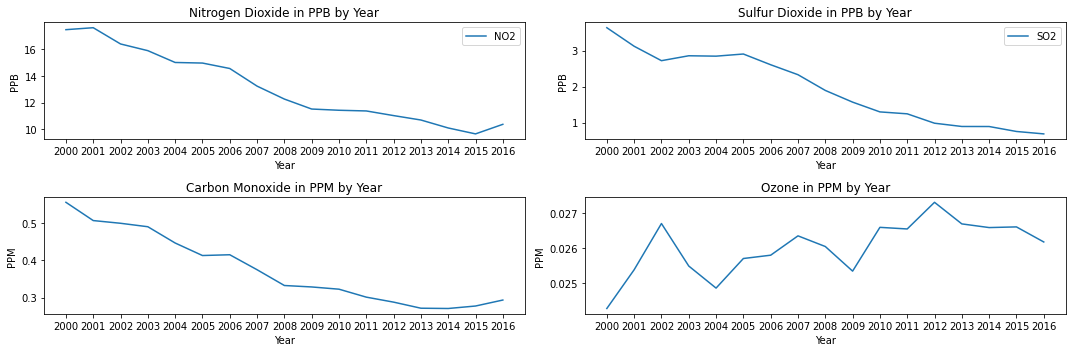

In [110]:
fig, ax = plt.subplots(2,2, figsize=(15,5))


  
ax[0,0].plot(y.index,y['NO2 Mean'], label='NO2')
ax[0,0].set_title('Nitrogen Dioxide in PPB by Year')
ax[0,0].set_xlabel('Year')
ax[0,0].set_ylabel('PPB')
ax[0,0].legend();



ax[0,1].plot(y.index,y['SO2 Mean'], label='SO2')
ax[0,1].set_title('Sulfur Dioxide in PPB by Year')
ax[0,1].set_xlabel('Year')
ax[0,1].set_ylabel('PPB')
ax[0,1].legend();


ax[1,0].plot(y.index,y['CO Mean'], label='CO')
ax[1,0].set_xlabel('Year')
ax[1,0].set_ylabel('PPM')
ax[1,0].set_title('Carbon Monoxide in PPM by Year')
ax[0,0].legend();


ax[1,1].plot(y.index,y['O3 Mean'], label='O3')
ax[1,1].set_xlabel('Year')
ax[1,1].set_ylabel('PPM')
ax[1,1].set_title('Ozone in PPM by Year')
ax[0,0].legend();

fig.tight_layout()  


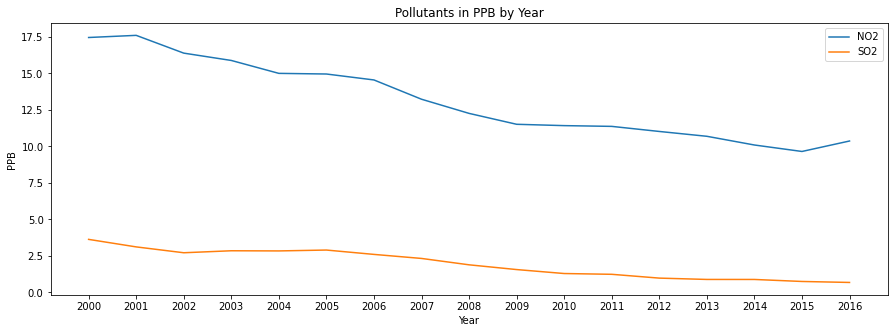

In [111]:
import numpy as np
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(y.index,y['NO2 Mean'], label='NO2')
ax.plot(y.index,y['SO2 Mean'], label='SO2')
ax.set_xlabel('Year')
ax.set_ylabel('PPB')
ax.set_title('Pollutants in PPB by Year')


ax.legend();

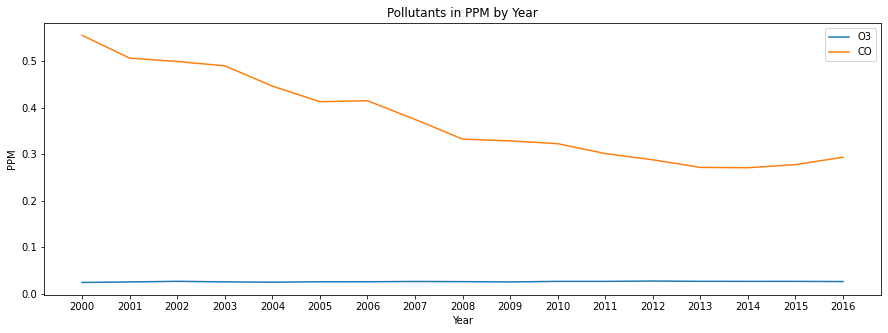

In [112]:
import numpy as np
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(y.index,y['O3 Mean'], label='O3')
ax.plot(y.index,y['CO Mean'], label='CO')
ax.set_xlabel('Year')
ax.set_ylabel('PPM')
ax.set_title('Pollutants in PPM by Year')


ax.legend();

In [115]:
groups = clean.copy()
groups['SO2 AQI Level'] = pd.cut(groups['SO2 AQI'], bins=[0,50,100,150,200,300,500], labels = ['Good','Moderate','Unhealthy for Sensitive Groups','Unhealthy','Very Unhealthy','Hazardous'])
groups['NO2 AQI Level'] = pd.cut(groups['NO2 AQI'], bins=[0,50,100,150,200,300,500], labels = ['Good','Moderate','Unhealthy for Sensitive Groups','Unhealthy','Very Unhealthy','Hazardous'])
groups['O3 AQI Level'] = pd.cut(groups['O3 AQI'], bins=[0,50,100,150,200,300,500], labels = ['Good','Moderate','Unhealthy for Sensitive Groups','Unhealthy','Very Unhealthy','Hazardous'])
groups['CO AQI Level'] = pd.cut(groups['CO AQI'], bins=[0,50,100,150,200,300,500], labels = ['Good','Moderate','Unhealthy for Sensitive Groups','Unhealthy','Very Unhealthy','Hazardous'])


In [116]:
aqi = groups[['year','SO2 AQI Level','NO2 AQI Level','O3 AQI Level','CO AQI Level']]

In [117]:
test = aqi.agg({'SO2 AQI Level':'value_counts','NO2 AQI Level':'value_counts','O3 AQI Level':'value_counts','CO AQI Level':'value_counts'})

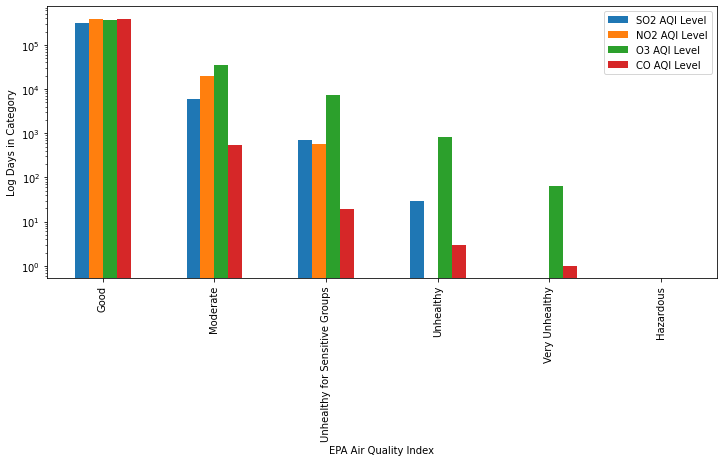

In [118]:

test.plot.bar(figsize=(12,5));
plt.ylabel('Log Days in Category')
plt.xlabel('EPA Air Quality Index')
plt.yscale('log');

In [119]:
montana = pd.Series([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
vermont = pd.Series([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
mississippi = pd.Series([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
add_states = pd.DataFrame([montana, vermont, mississippi],index = ['Montana', 'Vermont', 'Mississippi'])
add_states

add_states = add_states.rename(columns={0:'NO2 Mean', 1:'NO2 1st Max Value', 2:'NO2 1st Max Hour', 3:'NO2 AQI',
       4:'O3 Mean', 5:'O3 1st Max Value', 6:'O3 1st Max Hour', 7:'O3 AQI', 8:'SO2 Mean',
       9:'SO2 1st Max Value', 10:'SO2 1st Max Hour', 11:'SO2 AQI', 12:'CO Mean',
       13:'CO 1st Max Value', 14:'CO 1st Max Hour', 15:'CO AQI'})
s2 = s.append(add_states)


In [120]:
# read in a shapefile
map_df = gpd.read_file('/home/slindhult/assignments/Capstone-1/data/cb_2018_us_state_20m/cb_2018_us_state_20m.shp')
# check dataframe to confirm the geometry that you need
map_df.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827..."
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757..."
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ..."
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987..."


In [121]:
joined = map_df.set_index('NAME').join(s2)
joined = joined.loc[~joined.index.isin(['Alaska', 'Hawaii'])]

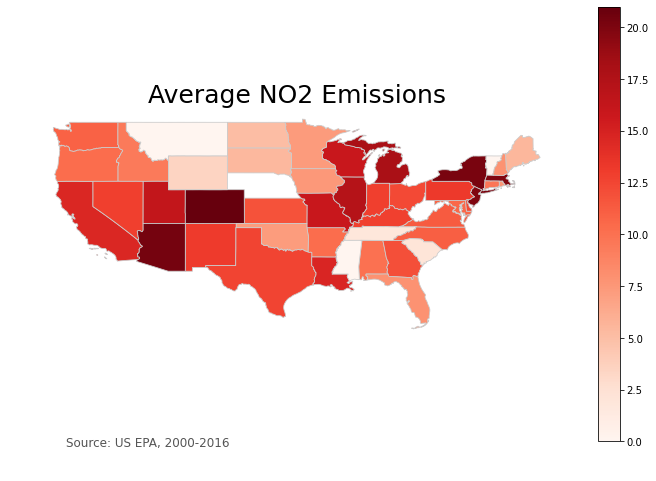

In [122]:
# set a variable to map
variable = 'NO2 Mean'
# set the range for the choropleth
vmin, vmax = 0,21 
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(12, 8))
joined.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8');
ax.axis('off')


# add a title
ax.set_title('Average NO2 Emissions', fontdict={'fontsize': '25', 'fontweight' : '3'})
# add annotation
ax.annotate('Source: US EPA, 2000-2016',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='center', fontsize=12, color='#555555')

# Create a colorbar
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# add the colorbar
cbar = fig.colorbar(sm)

In [123]:
s2['NO2 Mean'].max()

20.314785394295296

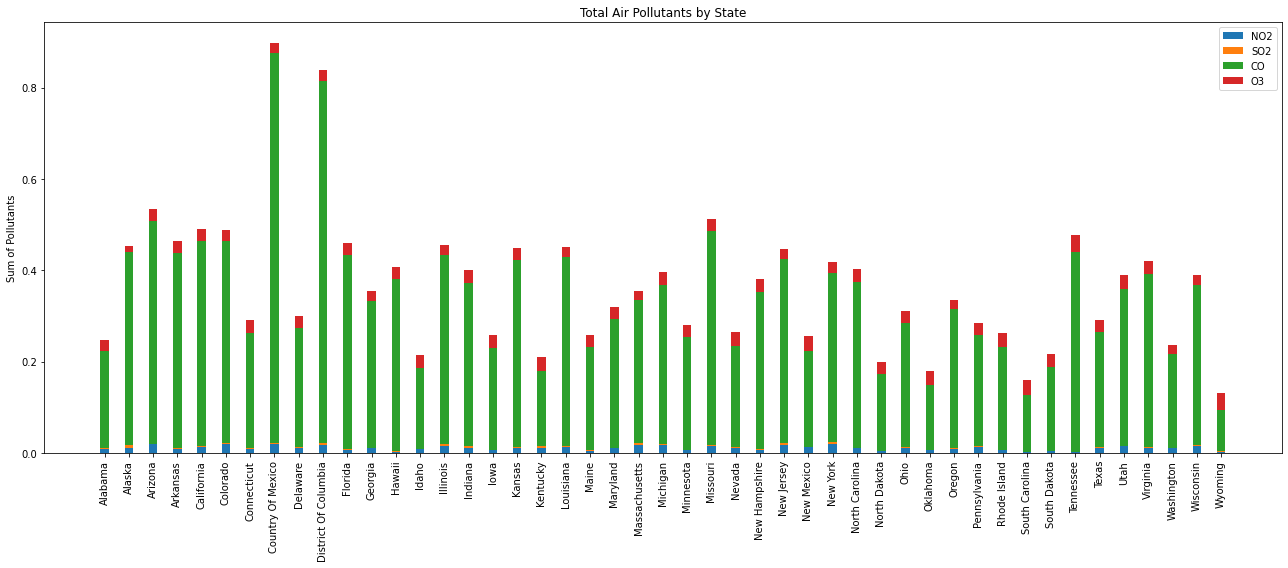

In [124]:
s3 = s.copy()
s3['SO2 Mean'] = s3['SO2 Mean']/1000
s3['NO2 Mean'] = s3['NO2 Mean']/1000

#corrected units to PPM
width = 0.35       

fig, ax = plt.subplots(figsize=(18,8))

ax.bar(s3.index, s3['NO2 Mean'], width, label='NO2')
ax.bar(s3.index, s3['SO2 Mean'], width, bottom=s3['NO2 Mean'],
       label='SO2')
ax.bar(s3.index, s3['CO Mean'], width, bottom = (s3['NO2 Mean'] + s3['SO2 Mean']), label='CO')
ax.bar(s3.index, s3['O3 Mean'], width, bottom=(s3['NO2 Mean'] + s3['SO2 Mean'] +s3['CO Mean']),
       label='O3')

ax.set_ylabel('Sum of Pollutants')
ax.set_title('Total Air Pollutants by State')
ax.legend()
ax.set_xticklabels(labels=s2.index,rotation=90)
fig.tight_layout() 
plt.show()

In [138]:
start = clean[(clean[['year']] == '2000').any(1)]
start = start.drop([
       'State', 'Date Local','year'], axis=1)

In [139]:
start

,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,31.000000,41.0,23.0,39.0,0.002750,0.006,11.0,5.0,11.645834,16.80,10.0,26.0,1.244518,1.50,2.5,16.0
1,5.272727,19.0,17.0,18.0,0.025917,0.028,14.0,24.0,2.524026,5.50,17.0,10.0,0.270933,0.30,5.0,3.0
2,17.652174,27.0,2.0,25.0,0.019333,0.029,14.0,25.0,2.338961,3.00,8.0,4.0,0.447343,0.70,4.0,7.0
3,9.304348,24.0,7.0,23.0,0.032917,0.041,10.0,35.0,0.402795,2.30,9.5,4.0,0.466787,1.00,9.0,9.0
4,31.083333,72.0,18.0,70.0,0.023350,0.038,10.0,32.0,7.737500,12.30,2.0,21.0,0.845943,1.50,20.5,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22791,13.166667,21.0,3.0,20.0,0.023526,0.030,9.0,25.0,8.277083,18.00,1.0,27.0,0.589583,0.70,3.0,8.0
22792,16.565217,36.0,16.0,34.0,0.022842,0.031,18.0,26.0,1.186956,2.50,14.0,4.0,0.397826,0.65,14.0,7.0
22793,12.708333,38.0,21.0,36.0,0.023632,0.033,10.0,28.0,1.987500,3.50,23.0,6.0,0.545833,1.10,21.5,9.0
22794,4.260870,9.0,16.0,8.0,0.031368,0.041,18.0,35.0,0.086336,0.80,16.5,1.0,0.246830,0.30,11.5,3.0


In [146]:
end = clean[(clean[['year']] == '2015').any(1)]

end = end.drop([
       'State', 'Date Local','year'], axis=1)

/home/slindhult/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/slindhult/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


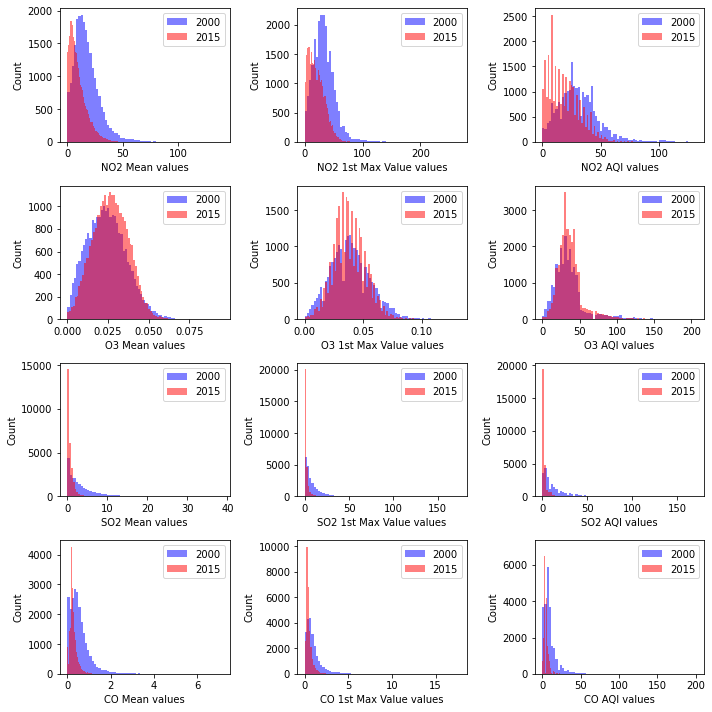

In [140]:
fig, axs = plt.subplots(4,3,figsize=(10,10))

axs=axs.flatten()
for i, col in enumerate(cols_list):   
    axs[i].hist(start[col], bins = 70, color='blue', label='2000', alpha = 0.5)
    axs[i].hist(end[col], bins=70, color='red', label='2015', alpha=0.5)
    axs[i].set_ylabel('Count')
    axs[i].set_xlabel(f'{col} values')
    axs[i].legend()

fig.tight_layout() 

In [141]:
cols_list = start.columns
def tvalue2(df1, df2, col):
    tstat, pvalue = sc.ttest_ind(df1[~df1[col].isna()][col],df2[~df2[col].isna()][col])
    return col, tstat, pvalue
tvalue_list = []
for col in cols_list:
    tvalue_list.append(tvalue2(start,end,col))

In [142]:
tvalue_list

[('NO2 Mean', 90.92040313633478, 0.0),
 ('NO2 1st Max Value', 85.8771847507526, 0.0),
 ('NO2 1st Max Hour', 10.096659025953773, 6.020627665054853e-24),
 ('NO2 AQI', 89.89946733507911, 0.0),
 ('O3 Mean', -22.843885802837274, 6.380903497476348e-115),
 ('O3 1st Max Value', 5.463820496178817, 4.681743507829133e-08),
 ('O3 1st Max Hour', -1.8090244550880048, 0.07045310352396732),
 ('O3 AQI', -9.01342503718475, 2.0645867086720272e-19),
 ('SO2 Mean', 112.10284530288669, 0.0),
 ('SO2 1st Max Value', 102.89537279708327, 0.0),
 ('SO2 1st Max Hour', 6.60329845137318, 4.060526528966089e-11),
 ('SO2 AQI', 109.49947074772325, 0.0),
 ('CO Mean', 90.62218420751637, 0.0),
 ('CO 1st Max Value', 88.80350064709424, 0.0),
 ('CO 1st Max Hour', 16.94199420221203, 3.309811509338001e-64),
 ('CO AQI', 88.49382100077675, 0.0)]

In [82]:
NO2corrSO2 = data['NO2 Mean'].corr(data['SO2 Mean'])
NO2corrCO = data['NO2 Mean'].corr(data['CO Mean'])
NO2corrO3 = data['NO2 Mean'].corr(data['O3 Mean'])
print(NO2corrSO2)
print(NO2corrCO)
print(NO2corrO3)
SO2corrSO2 = data['SO2 Mean'].corr(data['O3 Mean'])
SO2corrCO = data['SO2 Mean'].corr(data['CO Mean'])
print(SO2corrSO2)
print(SO2corrCO)
COcorrO3 = data['CO Mean'].corr(data['O3 Mean'])
print(COcorrO3)

0.3481860267850431
0.6418281040063403
-0.4326501374370645
-0.11040144027590058
0.21521637584882228
-0.33942643019387436


In [156]:
start2014 = clean[(clean[['year']] == '2010').any(1)]

start2014 = start2014.drop([
       'State', 'Date Local','year'], axis=1)

In [157]:
cols_list = start.columns
def tvalue2(df1, df2, col):
    tstat, pvalue = sc.ttest_ind(df1[~df1[col].isna()][col],df2[~df2[col].isna()][col])
    return col, tstat, pvalue
tvalue_list2 = []
for col in cols_list:
    tvalue_list2.append(tvalue2(start2014,end,col))

In [158]:
tvalue_list2

[('NO2 Mean', 24.737176089193106, 2.543125680721552e-134),
 ('NO2 1st Max Value', 24.401071121707794, 9.047099641037306e-131),
 ('NO2 1st Max Hour', 0.6788029070329493, 0.49726576330453576),
 ('NO2 AQI', 25.91686441360605, 3.6924760176376443e-147),
 ('O3 Mean', -0.13310373698998304, 0.8941118532216576),
 ('O3 1st Max Value', 6.418284087709723, 1.3899812110854663e-10),
 ('O3 1st Max Hour', 2.088574187212491, 0.0367509070572237),
 ('O3 AQI', -18.267251021735326, 2.5748907902613127e-74),
 ('SO2 Mean', 41.80279164835663, 0.0),
 ('SO2 1st Max Value', 31.649059505412097, 9.10008366001847e-218),
 ('SO2 1st Max Hour', -11.307702224251223, 1.3013560011970794e-29),
 ('SO2 AQI', 33.070723479460476, 2.3033642735420426e-237),
 ('CO Mean', 24.74907855427231, 1.8999591881663806e-134),
 ('CO 1st Max Value', 20.77312315931662, 1.8482347585887797e-95),
 ('CO 1st Max Hour', -1.4421727351043518, 0.1492596542859888),
 ('CO AQI', 22.652719498450516, 4.621829775974636e-113)]

In [160]:
month = clean.copy()
month['Date Local'] = pd.to_datetime(month['Date Local'], format="%Y-%m-%d")

month = month.groupby([(month['Date Local'].dt.year),(month['Date Local'].dt.month)]).mean()
month = month.reset_index(1)
month.rename(columns={'Date Local': 'Month'}, inplace=True)
month = month.reset_index()
month.rename(columns={'Date Local': 'Year'}, inplace=True)

In [161]:
month

,Year,Month,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,2000,1,23.399600,40.235294,12.773333,36.680000,0.013592,0.022965,10.183529,19.507451,3.844475,7.916980,10.527451,12.730196,0.945208,1.781804,10.151373,16.916732
1,2000,2,20.936676,37.831807,12.487927,35.103247,0.019711,0.031183,10.785179,26.666112,3.405941,7.424396,9.975853,11.908410,0.712425,1.377977,9.821815,12.726894
2,2000,3,17.724116,34.126654,12.705734,32.331443,0.025118,0.038594,10.449905,33.238815,3.151007,7.469471,10.212665,12.189666,0.535513,1.024417,8.952426,9.523329
3,2000,4,16.162970,32.677491,11.612100,30.941726,0.028414,0.042733,10.314947,37.596085,3.361897,8.511121,10.346975,14.031584,0.469515,0.837923,8.336299,7.853898
4,2000,5,14.995115,30.344294,11.447311,28.693485,0.031861,0.048075,10.259292,45.435505,3.390106,8.559204,9.753826,14.097070,0.421638,0.689364,7.848601,6.656756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,2016,1,12.452615,23.700059,12.311658,22.052724,0.021000,0.029631,10.520211,27.449326,0.827654,1.789807,10.140744,2.294601,0.333076,0.550625,8.625073,5.433509
193,2016,2,11.001452,23.337443,12.163934,21.729836,0.024898,0.035318,10.444262,32.783279,0.714366,1.710197,10.144098,2.227423,0.307431,0.506303,8.129180,4.887795
194,2016,3,8.793754,20.577679,11.142219,19.081633,0.029416,0.039481,10.348214,36.800064,0.576530,1.412643,9.517219,1.789729,0.260817,0.407041,7.351403,3.900510
195,2016,4,8.335997,20.006286,10.500000,18.470000,0.032897,0.043374,10.112143,41.557857,0.632613,1.642893,10.498214,2.129286,0.256003,0.381976,7.291429,3.660000


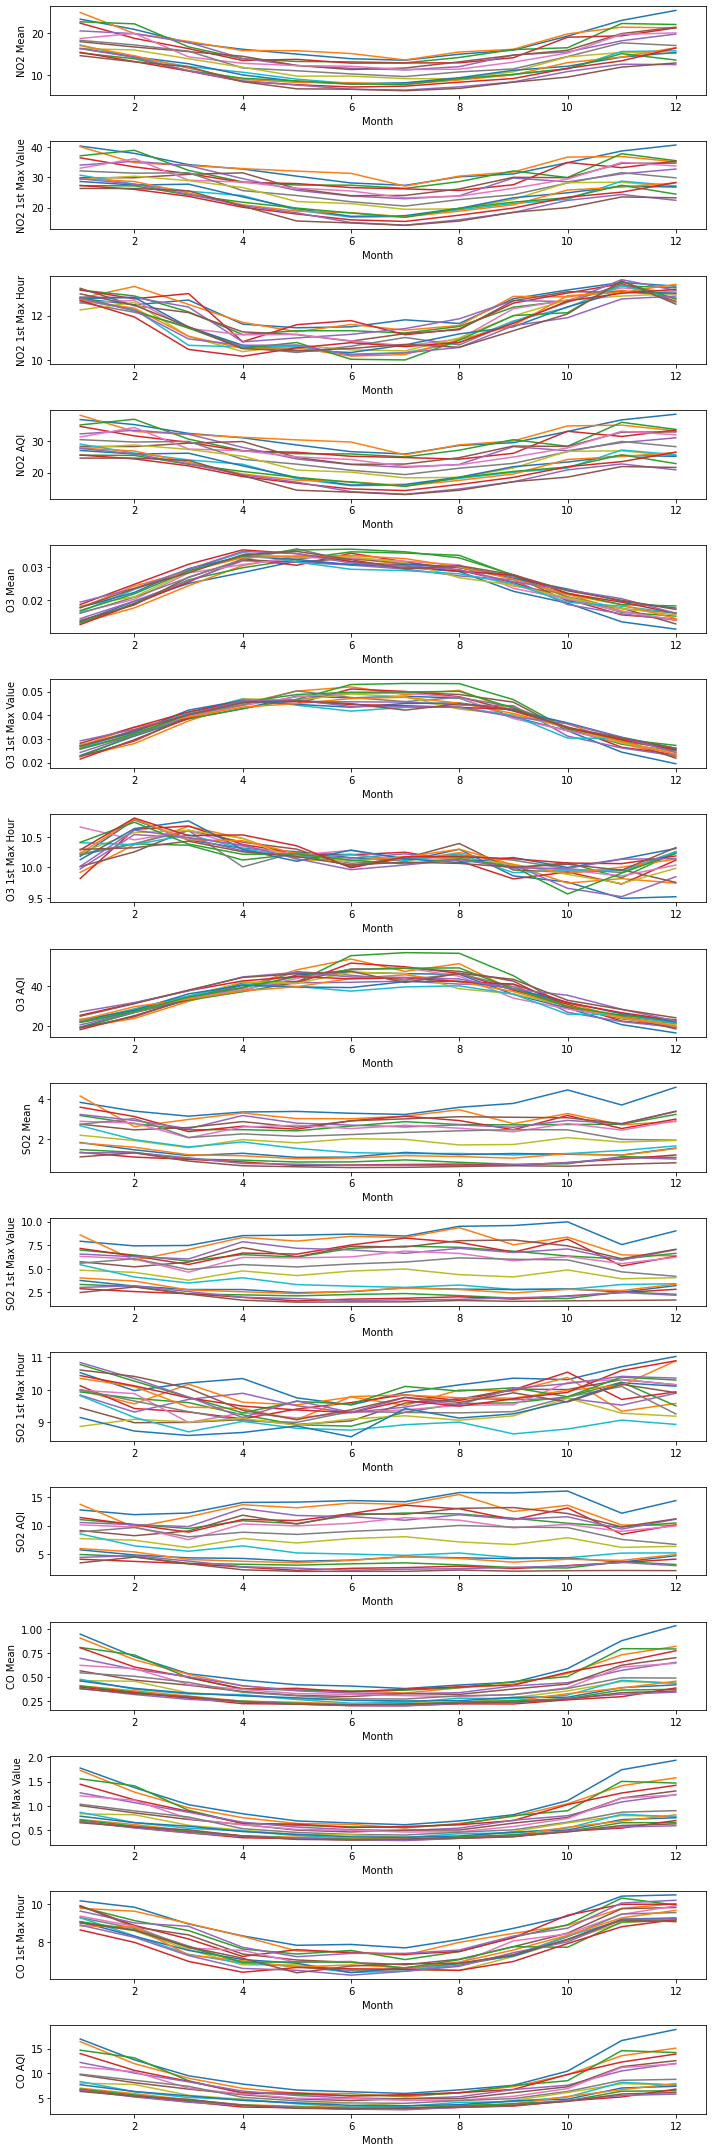

In [190]:
columns = ['NO2 Mean', 'NO2 1st Max Value', 'NO2 1st Max Hour',
       'NO2 AQI', 'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI']


fig, axs = plt.subplots(16,1, figsize=(10,30))


for i in range(2000,2016):
    df = month[(month[['Year']] == i).any(1)]
    for i, col in enumerate(columns):
        axs[i].plot(df['Month'],df[col], label=i)
        axs[i].set_xlabel('Month')
        axs[i].set_ylabel(col)
       





fig.tight_layout() 

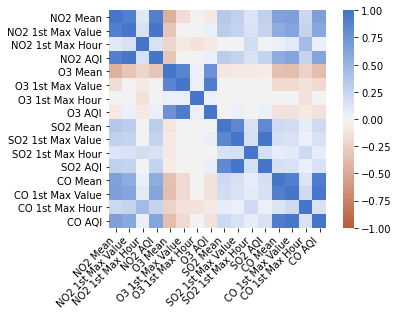

In [164]:
import seaborn as sns
corr = clean.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(25, 255, n=100),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [195]:
df2 = clean.copy()
df2['Date Local'] = pd.to_datetime(df2['Date Local'], format="%Y-%m-%d")

df2 = df2.groupby([df2['Date Local'].dt.month]).mean()
df2 = df2.reset_index()
df2.rename(columns={'Date Local': 'Month'}, inplace=True)


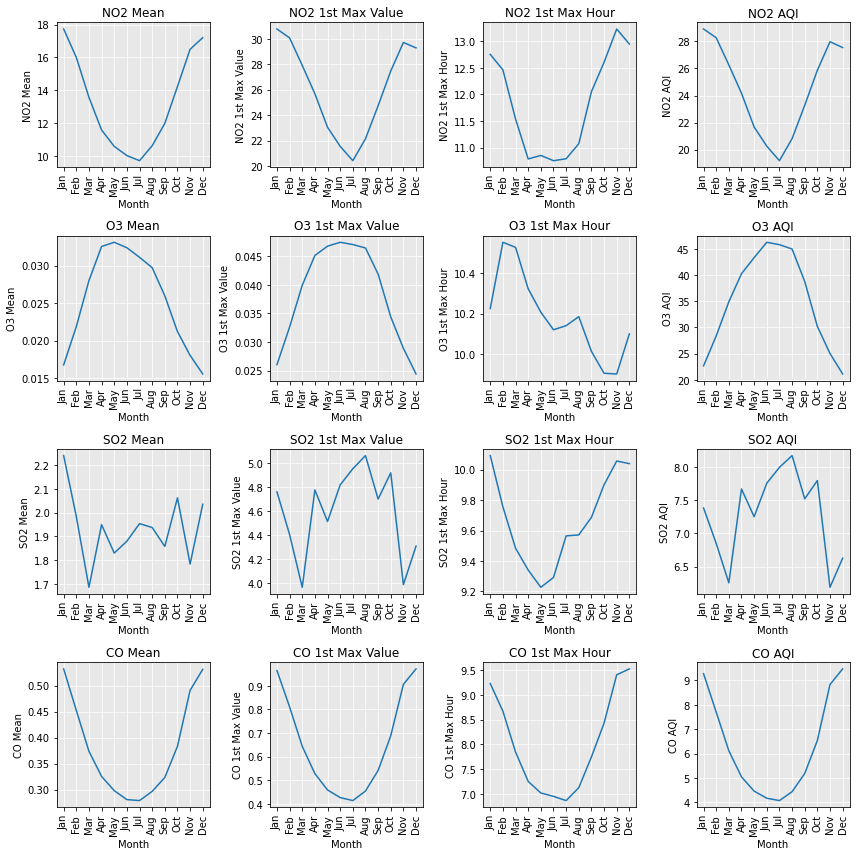

In [206]:
columns = ['NO2 Mean', 'NO2 1st Max Value', 'NO2 1st Max Hour',
       'NO2 AQI', 'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI']


fig, axs = plt.subplots(4,4, figsize=(12,12))
axs=axs.flatten()

for i, col in enumerate(columns):
    axs[i].plot(df2['Month'],df2[col], label=i)
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel(col)
    axs[i].set_facecolor('#E8E8E8')
    axs[i].grid(lw =.75, color='white')
    axs[i].set_title(col)
    axs[i].set_xticks(np.linspace(1,12,12))
    axs[i].set_xticklabels(m, rotation=90)


    fig.tight_layout() 

,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
373817,14.112500,27.8,8.0,25.0,0.013917,0.035,9.0,32.0,0.616667,1.40,1.0,1.0,0.997781,3.2025,2.5,23.0
373818,12.238095,25.0,21.0,24.0,0.020474,0.039,10.0,36.0,0.086904,0.15,5.5,0.0,0.408239,0.7485,4.5,7.0
373819,4.654167,6.6,17.0,6.0,0.013500,0.016,0.0,15.0,1.400000,4.50,2.0,6.0,0.211041,0.2300,11.5,2.0
373820,4.208333,6.0,3.0,6.0,0.026250,0.029,9.0,27.0,1.072917,1.80,4.5,3.0,0.300000,0.3000,2.5,3.0
373821,5.477273,10.4,16.0,9.0,0.021500,0.027,8.0,25.0,2.104348,3.70,7.0,6.0,0.188727,0.2370,11.5,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401902,11.600000,29.1,19.0,27.0,0.017000,0.028,9.0,26.0,0.722916,0.85,19.5,0.0,0.335834,0.5550,9.5,5.0
401903,2.541667,4.0,0.0,4.0,0.024895,0.029,12.0,27.0,0.095834,0.15,1.0,0.0,0.154041,0.1950,0.5,2.0
401904,15.225000,29.1,6.0,27.0,0.013474,0.023,18.0,21.0,0.404166,1.10,7.5,1.0,0.268354,0.5205,7.0,5.0
401905,4.582609,6.2,16.0,6.0,0.025105,0.027,16.0,25.0,0.090683,0.25,5.5,0.0,0.143354,0.2050,7.0,2.0
